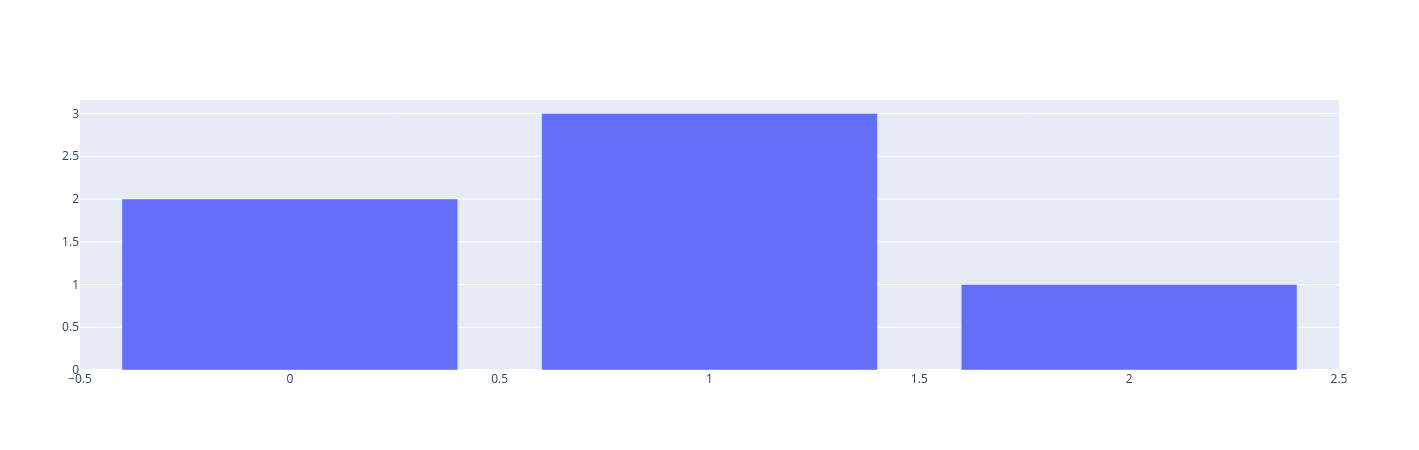

In [1]:
import plotly.graph_objects as go
fig = go.Figure(data=go.Bar(y=[2, 3, 1]))
fig.show()

In [6]:
!pip install chart_studio

     |████████████████████████████████| 64 kB 1.9 MB/s eta 0:00:011


In [2]:
import plotly.graph_objs as go
import chart_studio.plotly as py

In [3]:
# Data science imports
import pandas as pd
import numpy as np

In [11]:
# Cufflinks wrapper on plotly
!pip install cufflinks

     |████████████████████████████████| 81 kB 3.4 MB/s eta 0:00:011
  Created wheel for cufflinks: filename=cufflinks-0.17.3-py3-none-any.whl size=67921 sha256=fac05c632611c81b82fc8a0199d5bc6feff759d16fe214d961f70924b8c3eec9
  Stored in directory: /home/jovyan/.cache/pip/wheels/e1/27/13/3fe67fa7ea7be444b831d117220b3b586b872c9acd4df480d0
Successfully built cufflinks


In [4]:
import cufflinks

In [5]:
from plotly.offline import iplot
cufflinks.go_offline()

In [14]:
!pip install pyarrow

     |████████████████████████████████| 63.1 MB 85.9 MB/s eta 0:00:01    |████████████████████████▉       | 49.0 MB 3.6 MB/s eta 0:00:04


In [6]:
df = pd.read_parquet('medium_data_2019_01_06')
df.head()

claps  days_since_publication  fans  num_responses publication  \
121      2              574.742788     2              0        None   
122     18              567.424835     3              0        None   
123     50              554.804959    19              0        None   
119      0              553.962351     0              0        None   
116      0              549.974700     0              0        None   

         published_date  read_ratio  read_time  reads        started_date  \
121 2017-06-10 14:25:00       41.98          7     68 2017-06-10 14:24:00   
122 2017-06-17 22:02:00       32.93         14     54 2017-06-17 22:02:00   
123 2017-06-30 12:55:00       20.19         42    215 2017-06-30 12:00:00   
119 2017-07-01 09:08:00       35.85          9     19 2017-06-30 18:21:00   
116 2017-07-05 08:51:00        8.77         14      5 2017-07-03 20:18:00   

     ...       type views word_count  claps_per_word editing_days  \
121  ...  published   162       1859        0.001076            0   
122  ...  published   164       3891        0.004626            0   
123  ...  published  1065      12025        0.004158            0   
119  ...  published    53       2533        0.000000            0   
116  ...  published    57       3892        0.000000            1   

     <tag>Education  <tag>Data Science  <tag>Towards Data Science  \
121               0                  0                          0   
122               0                  0                          0   
123               0                  0                          0   
119               0                  0                          0   
116               0                  0                          0   

     <tag>Machine Learning  <tag>Python  
121                      0            0  
122                      0            0  
123                      1            1  
119                      0            0  
116                      0            0  

[5 rows x 24 columns]

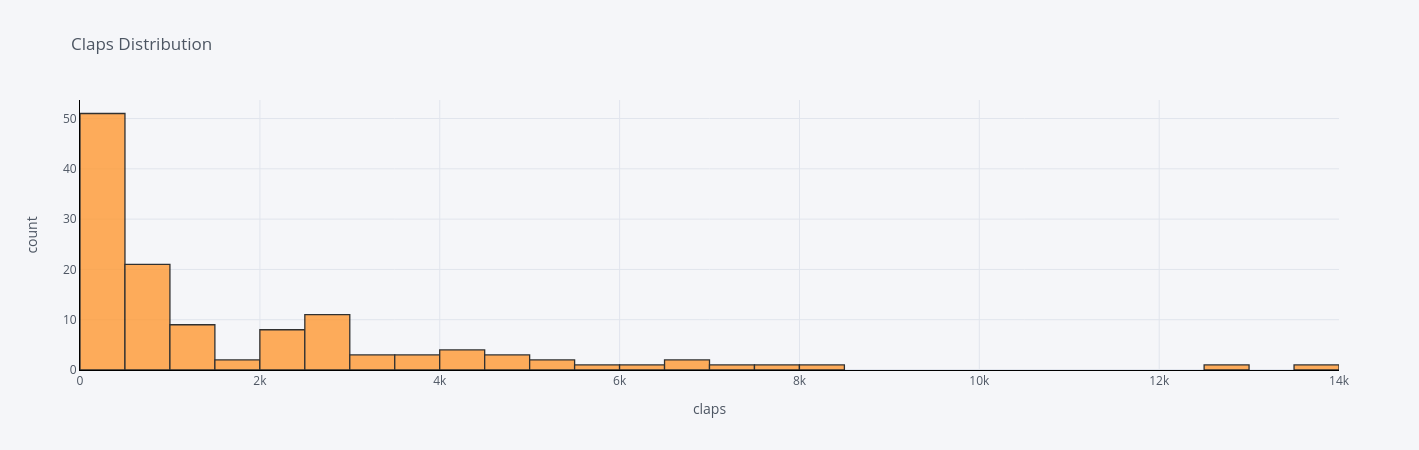

In [7]:
df['claps'].iplot(
    kind='hist',
    bins=30,
    xTitle='claps',
    linecolor='black',
    yTitle='count',
    title='Claps Distribution')

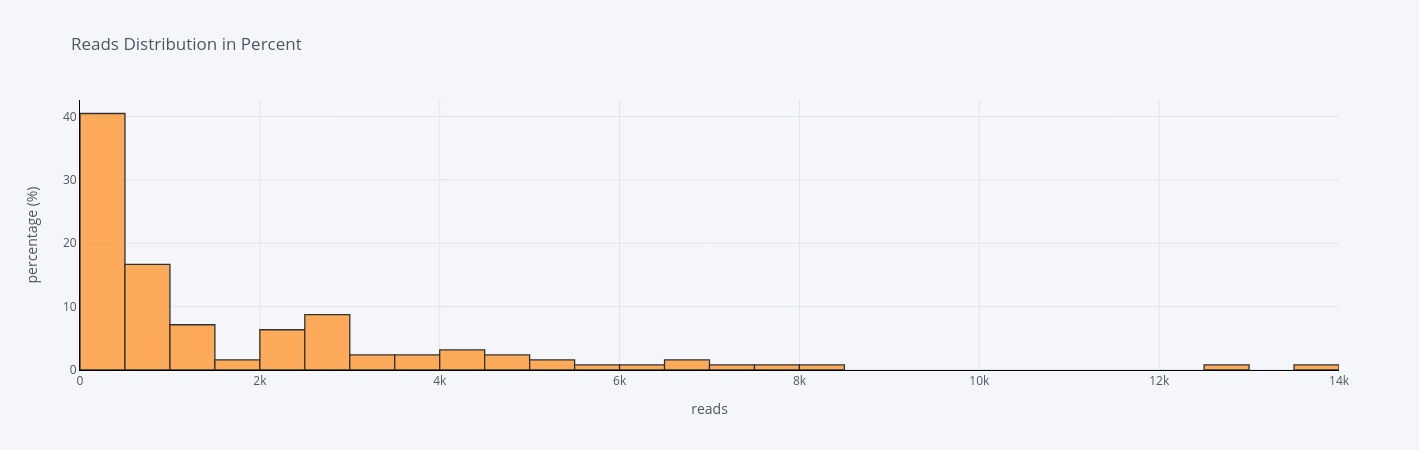

In [8]:
df['claps'].iplot(
    kind='hist',
    bins=30,
    xTitle='reads',
    linecolor='black',
    histnorm='percent',
    yTitle='percentage (%)',
    title='Reads Distribution in Percent')

In [9]:
def to_time(dt):
    return dt.hour + dt.minute / 60

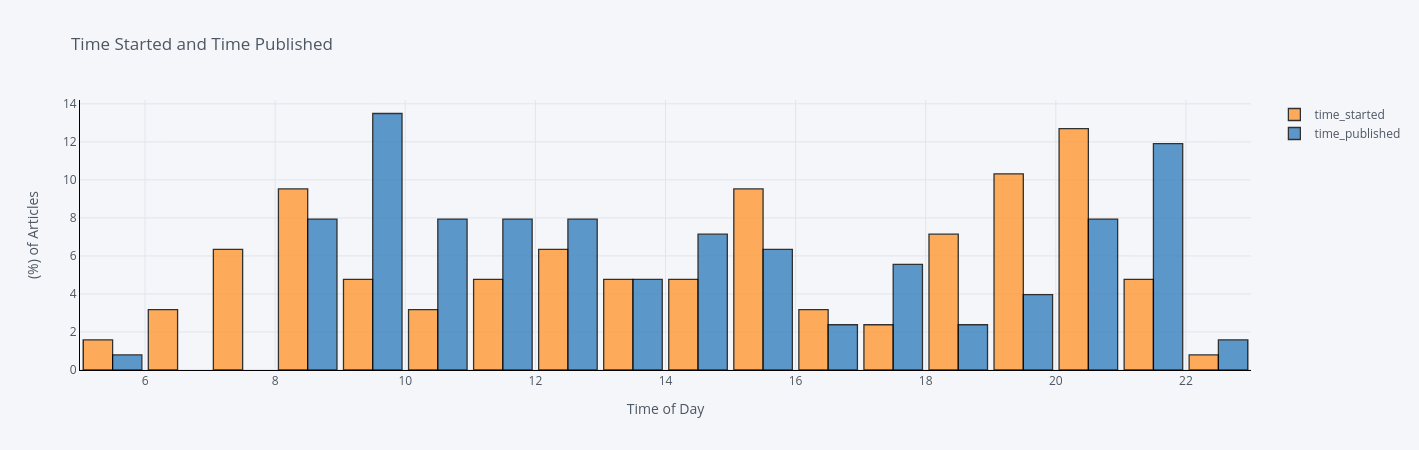

In [10]:
df['time_started'] = df['started_date'].apply(to_time)
df['time_published'] = df['published_date'].apply(to_time)

df[['time_started', 'time_published']].iplot(
    kind='hist',
    linecolor='black',
    bins=24,
    histnorm='percent',
    bargap=0.1,
    opacity=0.8,
    barmode='group',
    xTitle='Time of Day',
    yTitle='(%) of Articles',
    title='Time Started and Time Published')

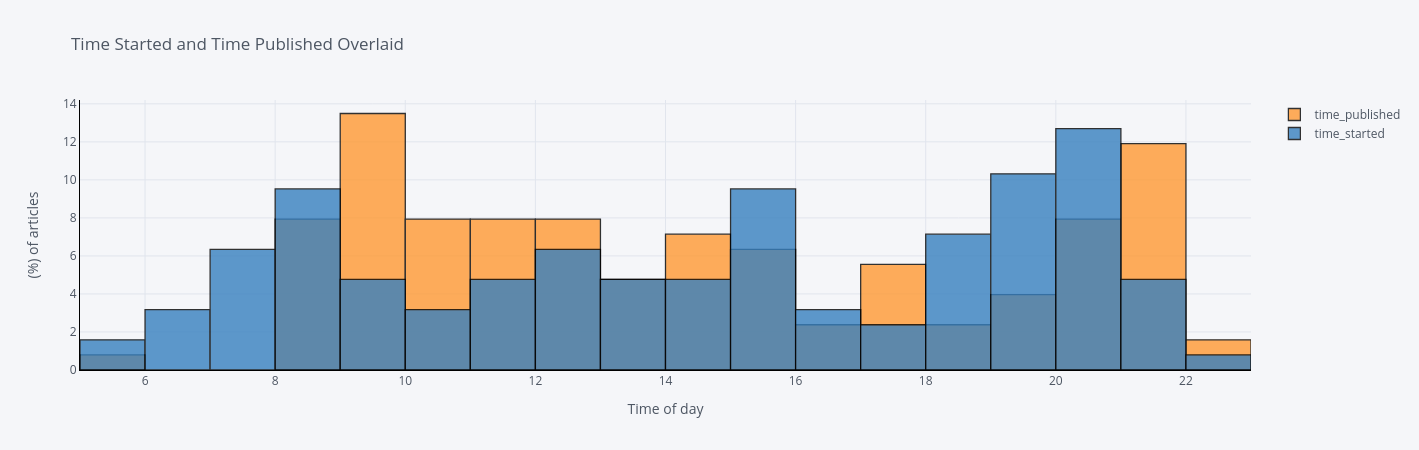

In [11]:
df[['time_published', 'time_started']].iplot(
    kind='hist',
    bins=24,
    linecolor='black',
    opacity=0.8,
    histnorm='percent',
    barmode='overlay',
    xTitle='Time of day',
    yTitle='(%) of articles',
    title='Time Started and Time Published Overlaid')

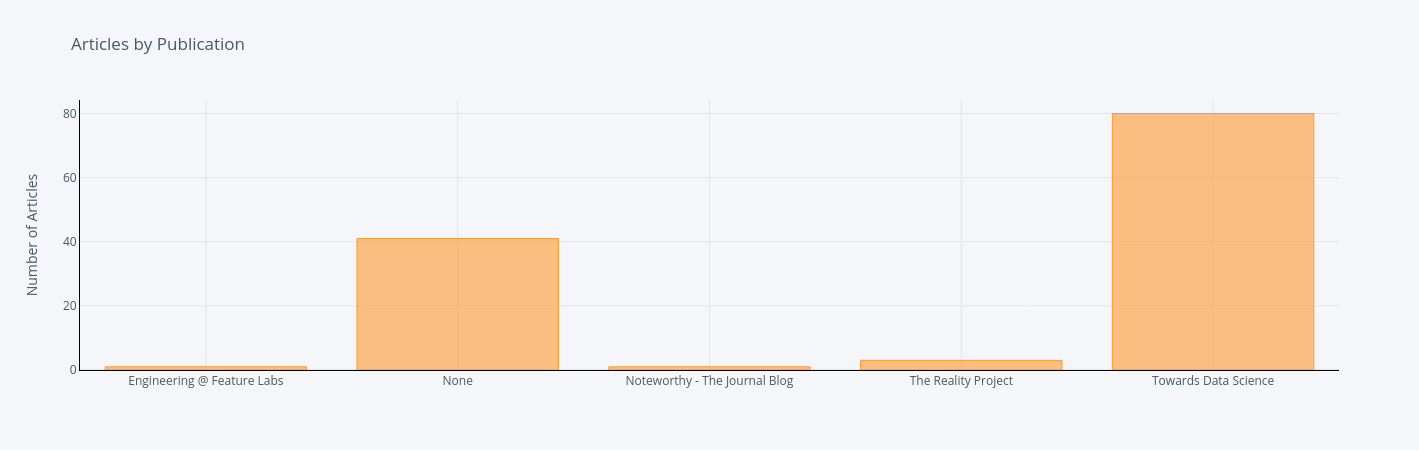

In [12]:
df.groupby('publication').count()['fans'].iplot(
    kind='bar', yTitle='Number of Articles', linecolor='black', title='Articles by Publication')

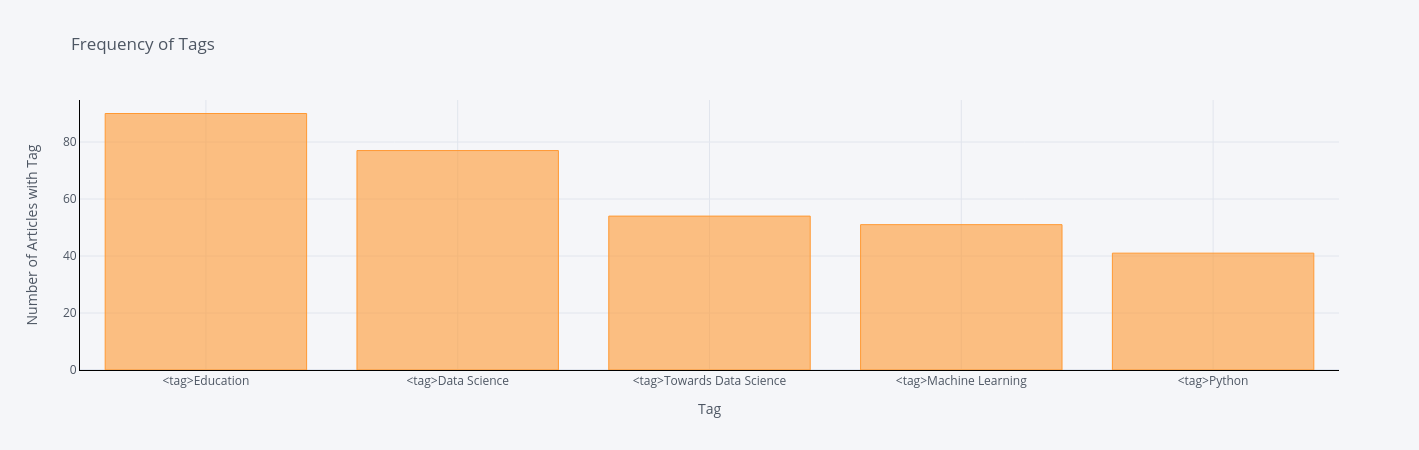

In [13]:
df[[c for c in df if '<tag>' in c]].sum().iplot(
    kind='bar',
    xTitle='Tag',
    yTitle='Number of Articles with Tag',
    title='Frequency of Tags',
    linecolor='black',
    sortbars=True)

In [14]:
df2 = df[['views', 'reads',
          'published_date']].set_index('published_date').resample('M').mean()
df2.head()

views        reads
published_date                          
2017-06-30       463.666667   112.333333
2017-07-31      5521.333333  1207.166667
2017-08-31      6242.800000   993.700000
2017-09-30      2113.000000   279.000000
2017-10-31              NaN          NaN

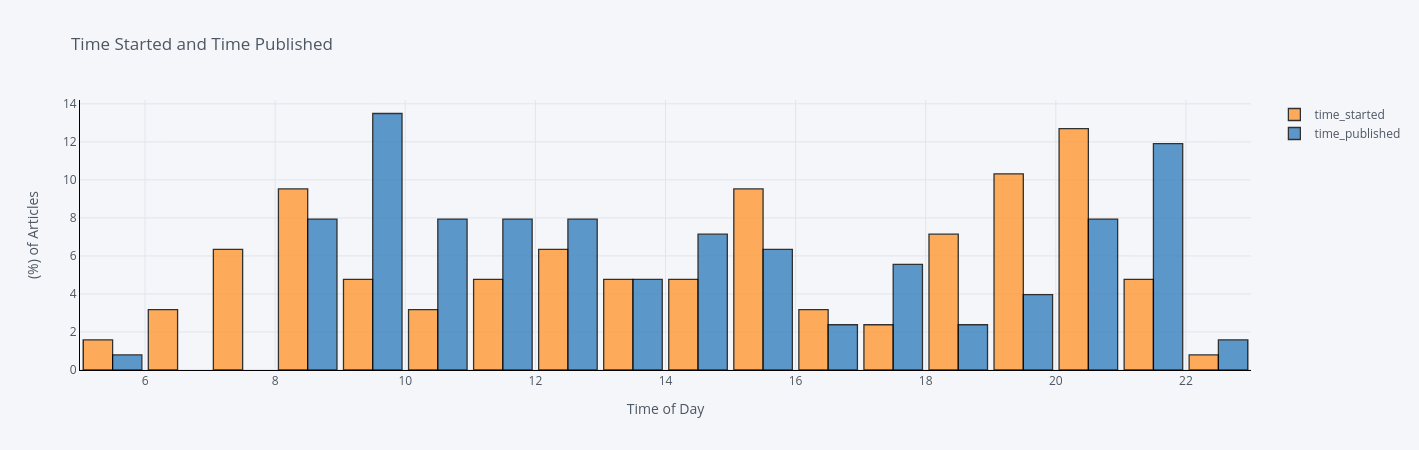

In [15]:
df['time_started'] = df['started_date'].apply(to_time)
df['time_published'] = df['published_date'].apply(to_time)

df[['time_started', 'time_published']].iplot(
    kind='hist',
    linecolor='black',
    bins=24,
    histnorm='percent',
    bargap=0.1,
    opacity=0.8,
    barmode='group',
    xTitle='Time of Day',
    yTitle='(%) of Articles',
    title='Time Started and Time Published')

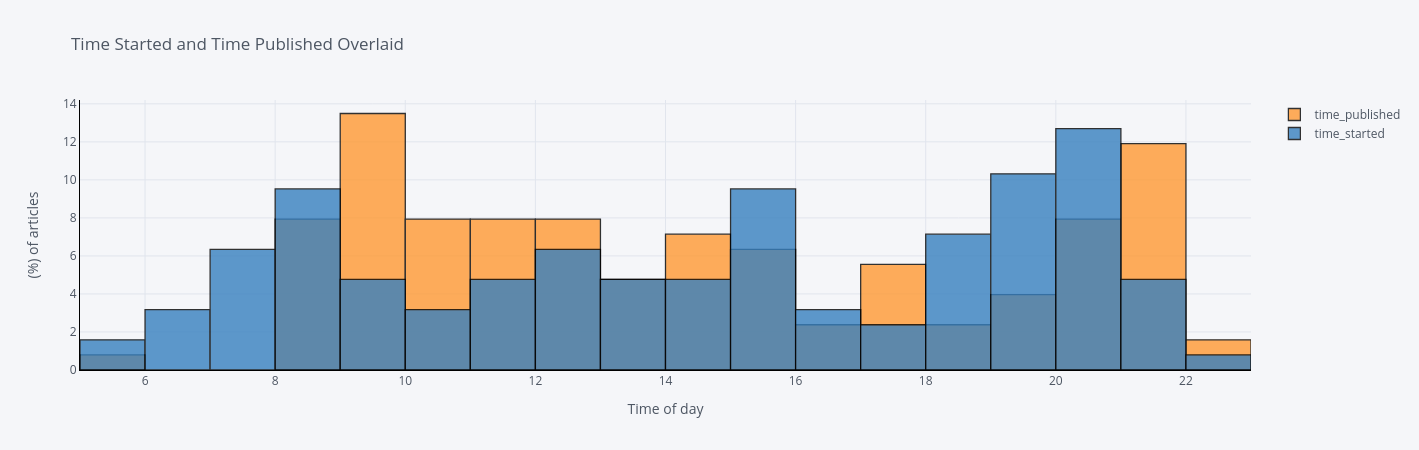

In [16]:
df[['time_published', 'time_started']].iplot(
    kind='hist',
    bins=24,
    linecolor='black',
    opacity=0.8,
    histnorm='percent',
    barmode='overlay',
    xTitle='Time of day',
    yTitle='(%) of articles',
    title='Time Started and Time Published Overlaid')

In [17]:
import plotly.figure_factory as ff

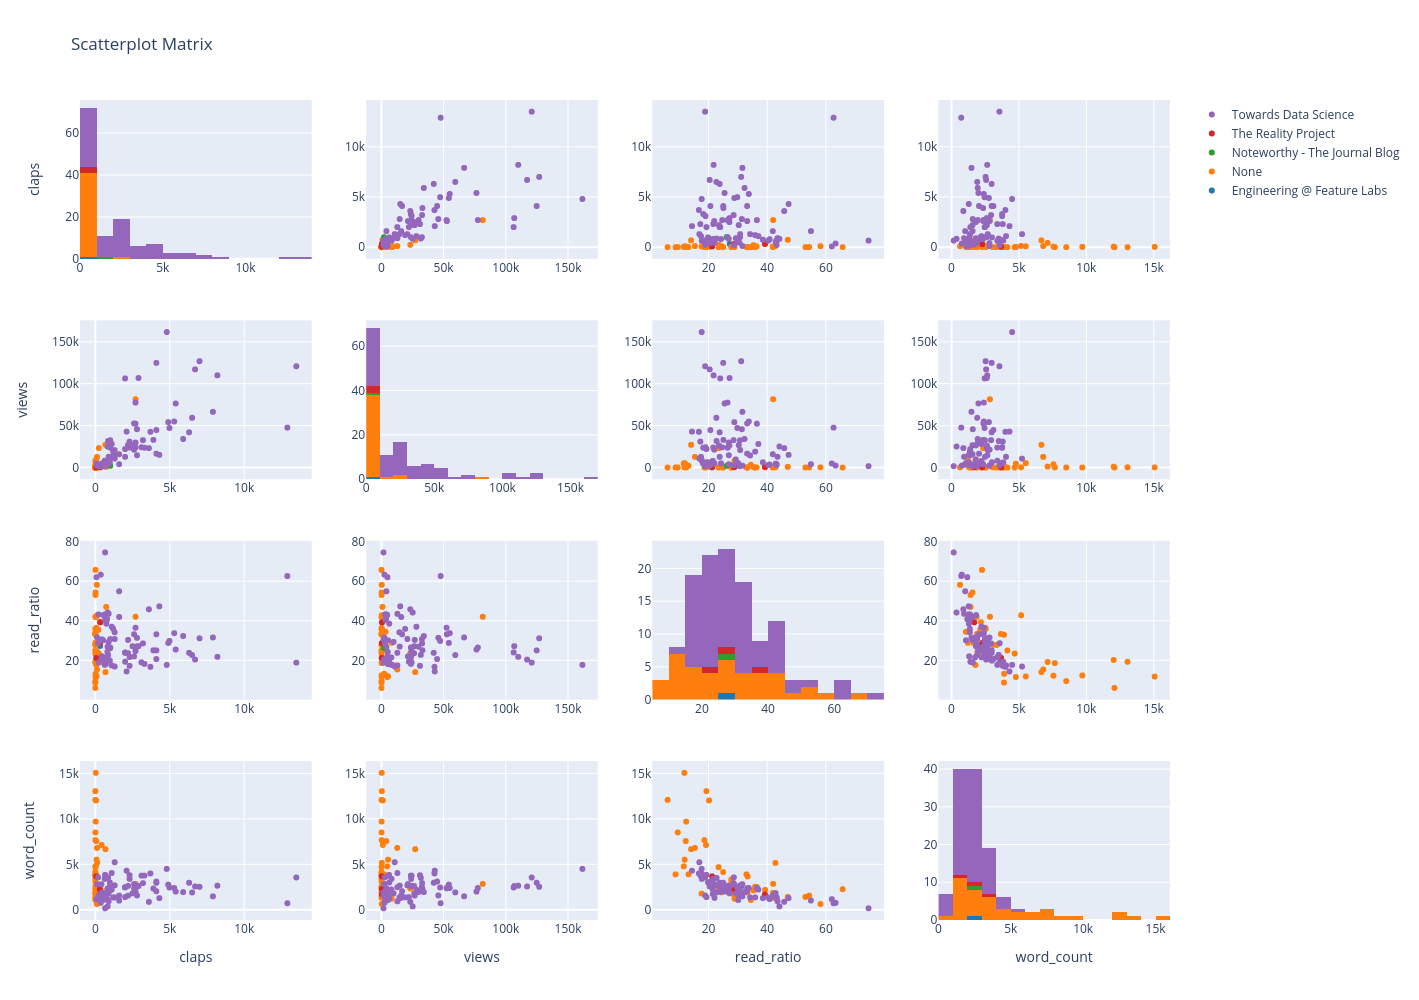

In [18]:
figure = ff.create_scatterplotmatrix(
    df[['claps', 'publication', 'views', 'read_ratio', 'word_count']],
    height=1000,
    width=1000,
    text=df['title'],
    diag='histogram',
    index='publication')
iplot(figure)

In [19]:
colorscales = [
    'Greys', 'YlGnBu', 'Greens', 'YlOrRd', 'Bluered', 'RdBu', 'Reds', 'Blues',
    'Picnic', 'Rainbow', 'Portland', 'Jet', 'Hot', 'Blackbody', 'Earth',
    'Electric', 'Viridis', 'Cividis'
]

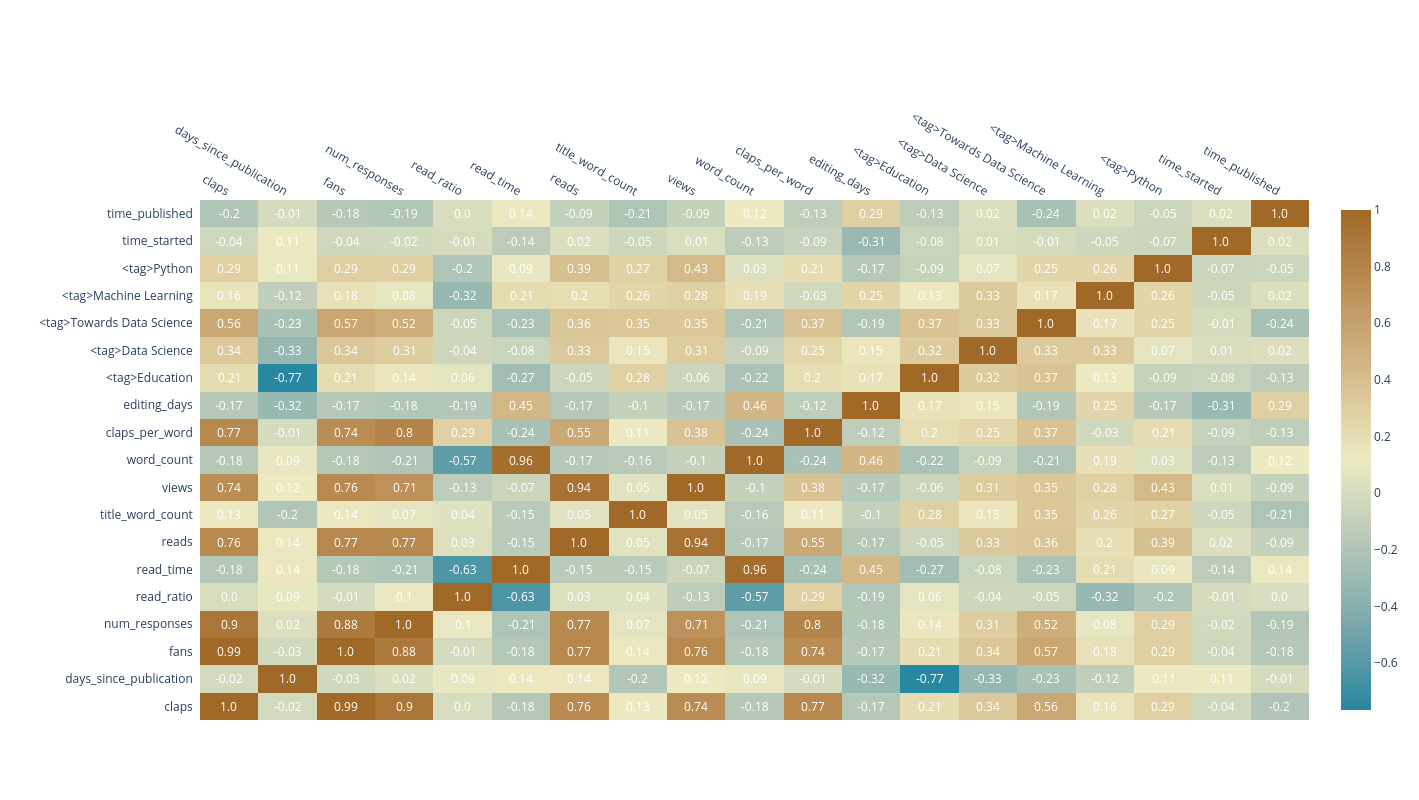

In [20]:
corrs = df.corr()

figure = ff.create_annotated_heatmap(
    z=corrs.values,
    x=list(corrs.columns),
    y=list(corrs.index),
    colorscale='Earth',
    annotation_text=corrs.round(2).values,
    showscale=True, reversescale=True)

figure.layout.margin = dict(l=200, t=200)
figure.layout.height = 800
figure.layout.width = 1000

iplot(figure)

/opt/conda/lib/python3.7/site-packages/cufflinks/plotlytools.py:850: FutureWarning:

The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead



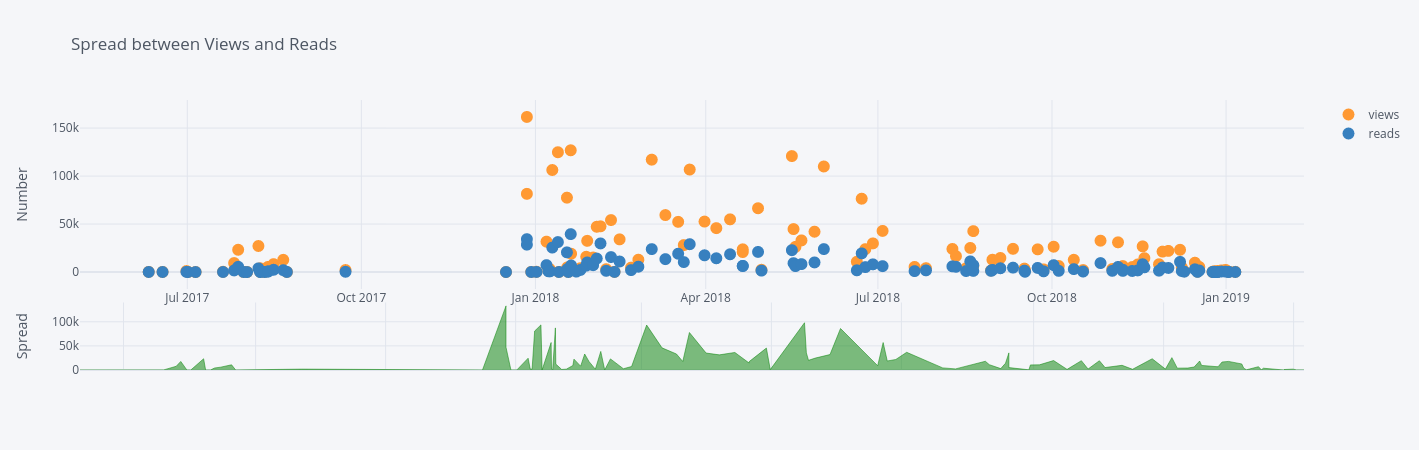

In [21]:
df.set_index('published_date')[['views', 'reads']].iplot(
    kind='spread', mode='markers', yTitle='Number', title='Spread between Views and Reads')

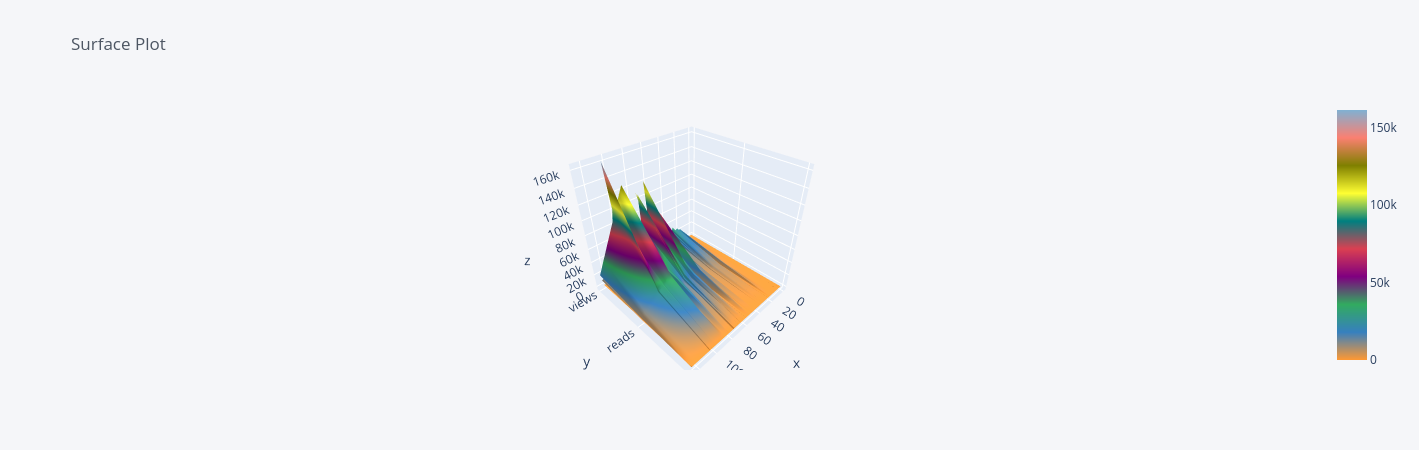

In [22]:
df[['views', 'reads', 'read_ratio']].iplot(
    kind='surface', title='Surface Plot')

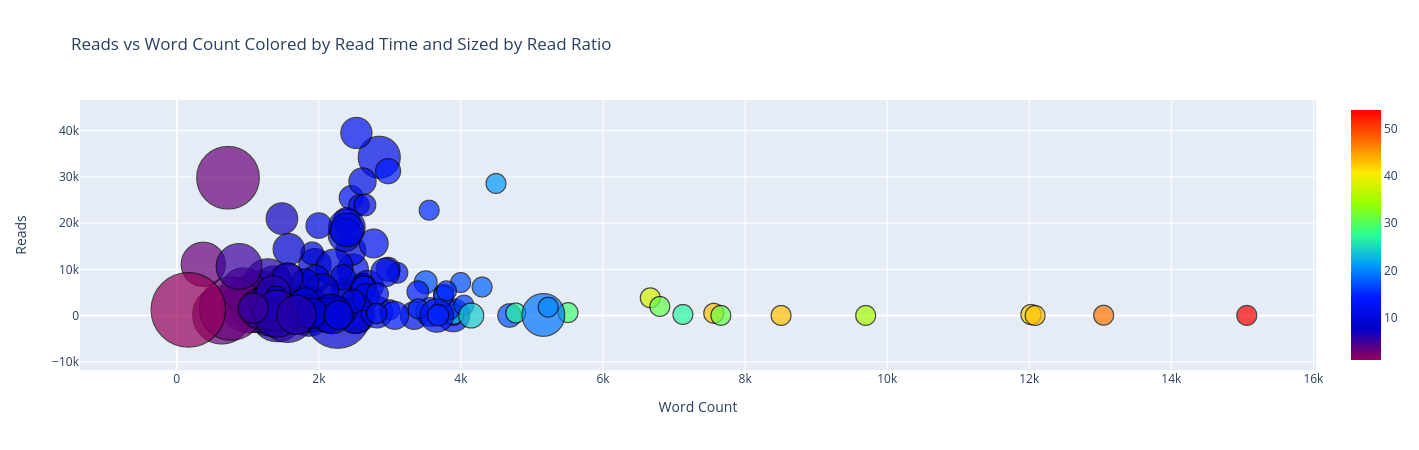

In [23]:
data = [
    go.Scatter(
        x=df['word_count'],
        y=df['reads'],
        text=df['title'],
        mode='markers',
        marker=dict(
            sizemin=10,
            size=df['read_ratio'],
            colorscale='Rainbow',
            showscale=True,
            color=df['read_time'],
            line=dict(color='black', width=1.2)))
]

figure = go.Figure(
    data=data,
    layout=go.Layout(
        xaxis=dict(title='Word Count'),
        yaxis=dict(title='Reads'),
        title='Reads vs Word Count Colored by Read Time and Sized by Read Ratio'
    ))

iplot(figure)

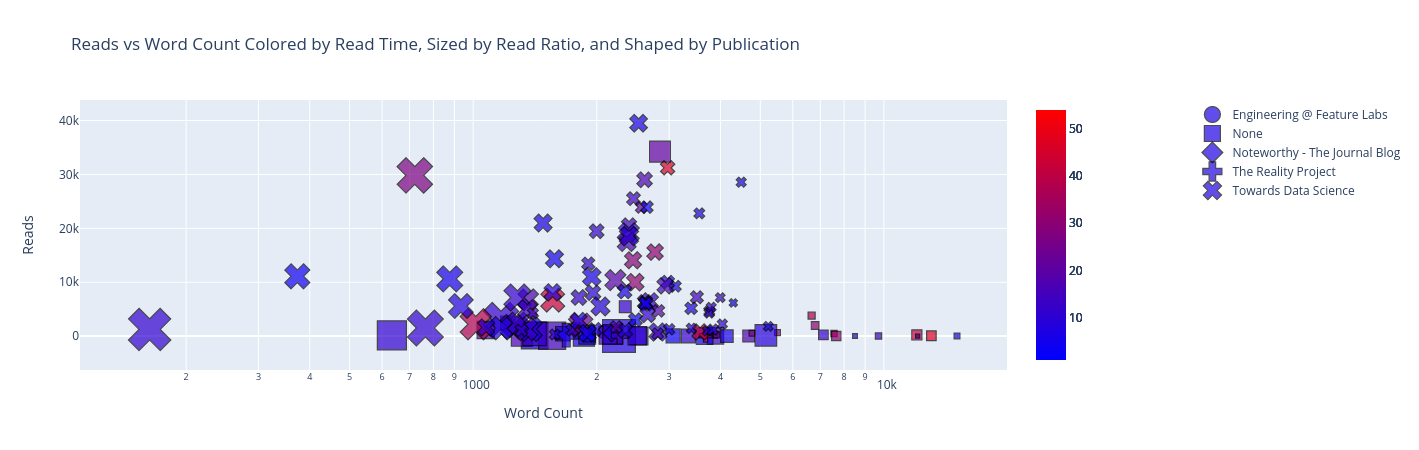

In [24]:
data = [
    go.Scatter(
        x=grouped['word_count'],
        y=grouped['reads'],
        text=grouped['title'],
        mode='markers',
        name=name,
        marker=dict(
            symbol=i,
            sizemin=2,
            sizeref=2,
            size=grouped['read_ratio'],
            colorscale='BlueRed',
            showscale=True,
            color=df['read_time'],
            line=dict(color='black', width=1.2)))
    for i, (name, grouped) in enumerate(df.groupby('publication'))
]

figure = go.Figure(
    data=data,
    layout=go.Layout(
        legend=dict(x=1.2),
        width=1000,
        margin=dict(r=20),
        xaxis=dict(type='log', title='Word Count'),
        yaxis=dict(title='Reads'),
        title='Reads vs Word Count Colored by Read Time, Sized by Read Ratio, and Shaped by Publication'
    ))

iplot(figure)